##  Lead Score Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Step 1: Importing libraries and data

In [195]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [197]:
# Import the dataset
lead_data = pd.read_csv('Leads.csv')

In [198]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [199]:
# Check the dimensions of the data
lead_data.shape

(9240, 37)

In [200]:
# Checking statistical aspects of the data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [201]:
# Checking the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### There are 30 categorical columns and we need create dummy variables for the ones we need for modelling.
#### Also, the columns 'Prospect ID' and 'Lead Number' adds no value and hence can be dropped

## Exploratory Data Analysis

### Step 2: Data Cleaning

#### 2.1 Identify missing values

In [202]:
# Check and drop the two columns which are unique identifiers
lead_data['Prospect ID'].isnull().sum() == 0

True

In [203]:
lead_data['Lead Number'].isnull().sum() == 0

True

In [204]:
lead_data.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

#### As mentioned in the problem statement, there are categorical columns with 'Select' as a value. We need to replace that with nulls

In [205]:
lead_data.replace("Select", np.nan, inplace=True)

In [206]:
# Check for missing values percentage in every column:
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### 2.2 Dropping variables with missing value > 40%

In [207]:
# Drop all columns where missing value > 40%
cols = lead_data.columns

for col in cols:
    if ((100*(lead_data[col].isnull().sum()/len(lead_data.index))) >= 40):
        lead_data.drop(col, axis = 1, inplace = True)

In [208]:
# Checking missing value percentage after dropping the columns
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [209]:
# The column 'Tags' has high missing value% and also, does not make sense to keep. Hence dropping this
lead_data.drop('Tags', axis = 1, inplace = True)

#### 2.3 Analysing Categorical columns

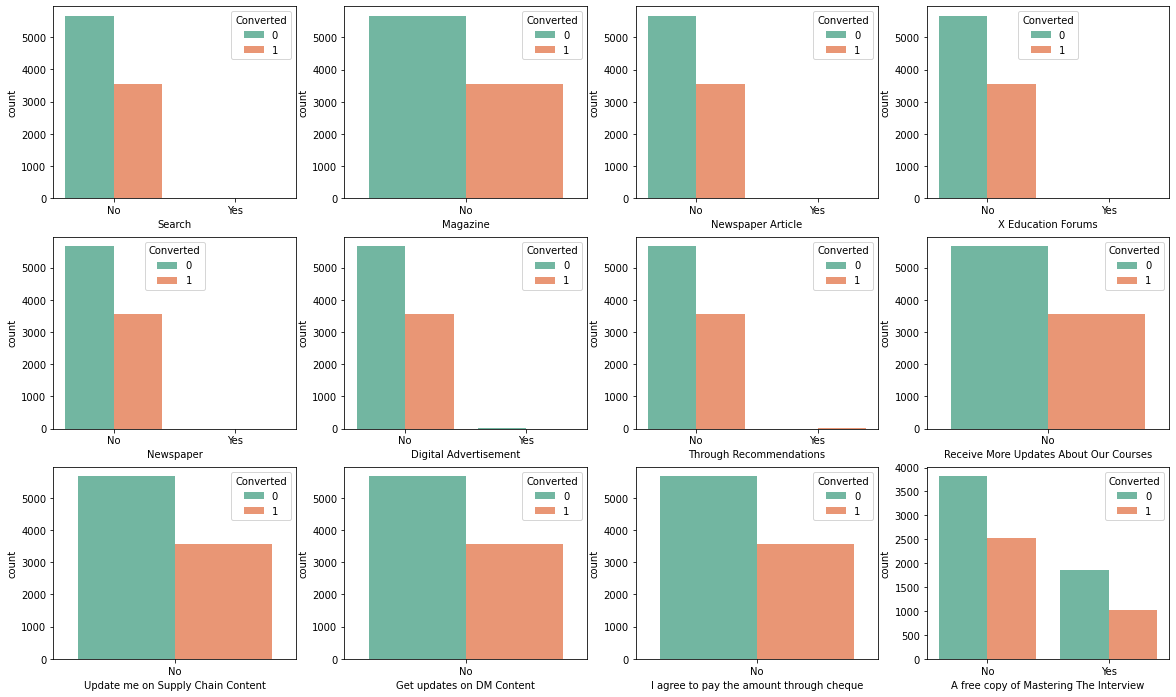

In [210]:
# Let's visualize some of the categorical features against the Target variable 'Converted' using countplot
fig, axs = plt.subplots(3,4, figsize = (20,12))
sns.countplot( x = 'Search', hue = 'Converted', data = lead_data, ax = axs[0,0], palette = 'Set2')
sns.countplot( x = 'Magazine', hue = 'Converted', data = lead_data, ax = axs[0,1], palette = 'Set2')
sns.countplot( x = 'Newspaper Article', hue = 'Converted', data = lead_data, ax = axs[0,2], palette = 'Set2')
sns.countplot( x = 'X Education Forums', hue = 'Converted', data = lead_data, ax = axs[0,3], palette = 'Set2')
sns.countplot( x = 'Newspaper', hue = 'Converted', data = lead_data, ax = axs[1,0], palette = 'Set2')
sns.countplot( x = 'Digital Advertisement', hue = 'Converted', data = lead_data, ax = axs[1,1], palette = 'Set2')
sns.countplot( x = 'Through Recommendations', hue = 'Converted', data = lead_data, ax = axs[1,2], palette = 'Set2')
sns.countplot( x = 'Receive More Updates About Our Courses', hue = 'Converted', data = lead_data, ax = axs[1,3], palette = 'Set2')
sns.countplot( x = 'Update me on Supply Chain Content', hue = 'Converted', data = lead_data, ax = axs[2,0], palette = 'Set2')
sns.countplot( x = 'Get updates on DM Content', hue = 'Converted', data = lead_data, ax = axs[2,1], palette = 'Set2')
sns.countplot( x = 'I agree to pay the amount through cheque', hue = 'Converted', data = lead_data, ax = axs[2,2], palette = 'Set2')
sns.countplot( x = 'A free copy of Mastering The Interview', hue = 'Converted', data = lead_data, ax = axs[2,3], palette = 'Set2')
plt.show()

### Inference
#### The data seems to be highly imbalanced except for column 'A free copy of Mastering The Interview'. This column also does not make any sense. Hence we can drop all of these.

In [211]:
# Creating the list of columns to drop and this list would be kept until all columns to drop are identified
cols_drop = ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

### Categorical Column 1: Lead Source

In [212]:
# Checking for categories in Lead source along with nulls
lead_data['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

#### Since Google has the highest count, we can replace all nulls with Google and also replace 'google' with Google

In [213]:
#replacing Nan Value with Google
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.nan,'Google')

# Changing 'google' to 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google','Google')

In [214]:
lead_data['Lead Source'].value_counts()

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [215]:
#combining low frequency values to Others

lead_data['Lead Source'] = lead_data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

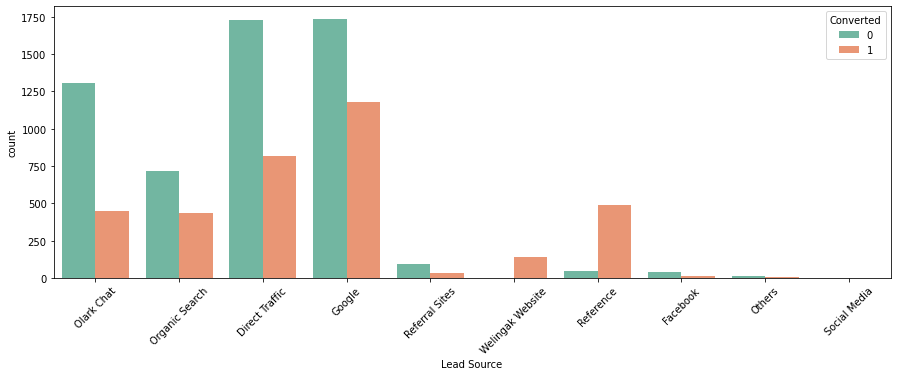

In [216]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =lead_data , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

### Inference
#### 1. Lead Source for 'Google' and 'Direct Traffic' is the highest
#### 2. The conversion rate for Reference and Welingak Website is very high

In [217]:
lead_data.shape

(9240, 27)

### Categorical Column 2: Country

In [218]:
# Checking for categories in Country along with nulls
lead_data['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [219]:
#Imputing missing values in Country column with "'not provided"
lead_data['Country'] = lead_data['Country'].replace(np.nan,'not provided')

In [220]:
lead_data.shape

(9240, 27)

### Inference
#### There is a huge imbalance in this column data. Other than India, rest of the countries are insignificant. Hence we can add this to the cols to drop list

In [221]:
#creating a list of columns to be droppped

cols_drop.append('Country')

#checking out list of columns to be dropped
cols_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

### Categorical Column 3: Specialization

In [222]:
lead_data['Specialization'].value_counts( dropna = False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

### Inference:
#### This column also has a high missing value % if we include 'Select' as well as nulls. So we can simply drop this

In [223]:
lead_data.drop('Specialization', axis = 1, inplace = True)

### Categorical Column 3: What is your current occupation

In [224]:
# Checking for categories along with nulls
lead_data['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [225]:
#Imputing missing values in the column with "'not provided"
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan,'Not provided')

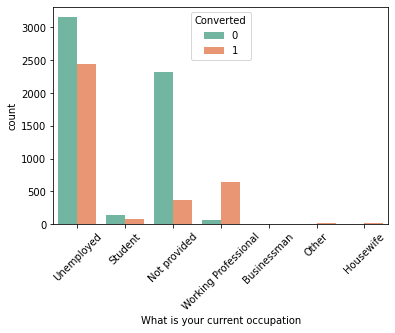

In [226]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = lead_data , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

### Inference
#### 1. Conversion rate is really high for Unemployed
#### 2. Working professional also has high conversion rate although the frequency is less

### Categorical Column 4: What matters most to you in choosing a course 

In [227]:
# Checking for categories along with nulls
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [228]:
#Imputing missing values in the column with Better Career Prospects as this is the one that is selected the most 
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

### Inference
#### This column is highly imbalanced and hence not adding any value to the conclusion. Hence can be dropped

In [229]:
#creating a list of columns to be droppped

cols_drop.append('What matters most to you in choosing a course')

#checking out list of columns to be dropped
cols_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

In [230]:
# The column 'City' can also be dropped since this is also not relevant, since we are already dropping Country as well.
lead_data.drop('City', axis = 1, inplace = True)

In [231]:
# Checking for missing value % once again
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

### Categorical Column 5: Last Activity 

In [232]:
# Checking for categories along with nulls
lead_data['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [233]:
# Here we can impute the NaN values with 'Email Opened'
lead_data['Last Activity'] = lead_data['Last Activity'].replace(np.nan, 'Email Opened')

In [234]:
#combining low frequency values
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

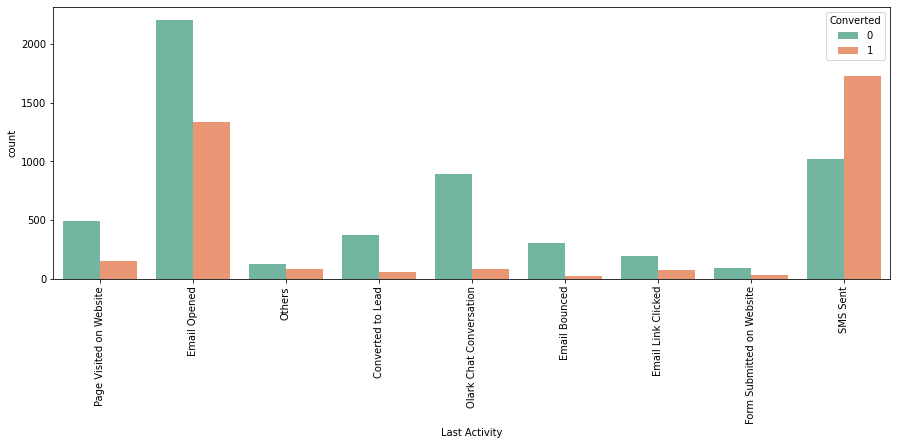

In [235]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = lead_data , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Inference
#### 1. Both Email Opened and SMS sent has high frequencies. However, the conversion rate seems to be high for SMS Sent than Email Opened
#### 2. This column can also be dropped since this is maintained by the compnay and does not add any value to our conclusion on leads

In [236]:
#creating a list of columns to be droppped

cols_drop.append('Last Activity')

#checking out list of columns to be dropped
cols_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [237]:
lead_data.shape

(9240, 25)

In [238]:
# Since the null value% for the other two columns : 'Total Visits' and 'Page Views per Visit' is less than 2% , we can just drop the rows
lead_data = lead_data.dropna()

In [239]:
# Checking again for missing value %
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

### Categorical Column 6: Lead Origin

In [240]:
# Checking for categories along with nulls
lead_data['Lead Origin'].value_counts(dropna=False)

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64

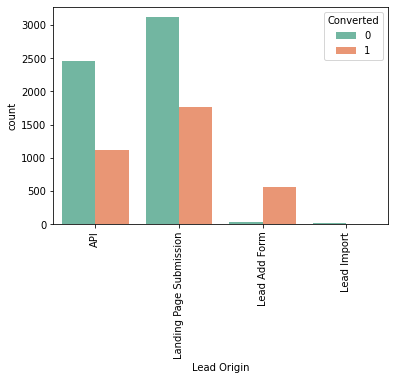

In [241]:
#visualizing count of Lead origin Variable 

#plt.figure(figsize=(15,5))
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = lead_data , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Categorical Column 7 and 8: Do Not Email and Do Not Call

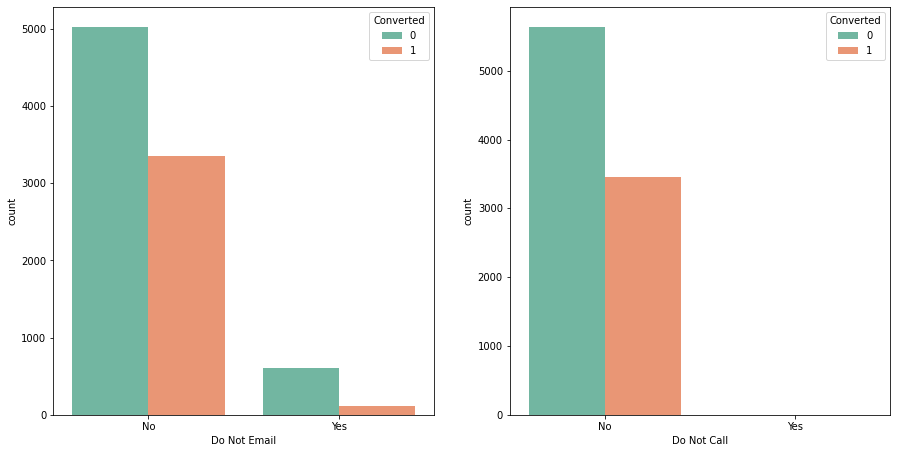

In [242]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data, ax = axs[0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data, ax = axs[1],palette = 'Set2')
plt.show()

In [243]:
# Append 'Do Not Call' to the cols_to_drop List since it has highly skewed data
cols_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

### Categorical Column 9: Last Notable Activity

In [244]:
#checking value counts of last Notable Activity
lead_data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [245]:
#clubbing lower frequency values

lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

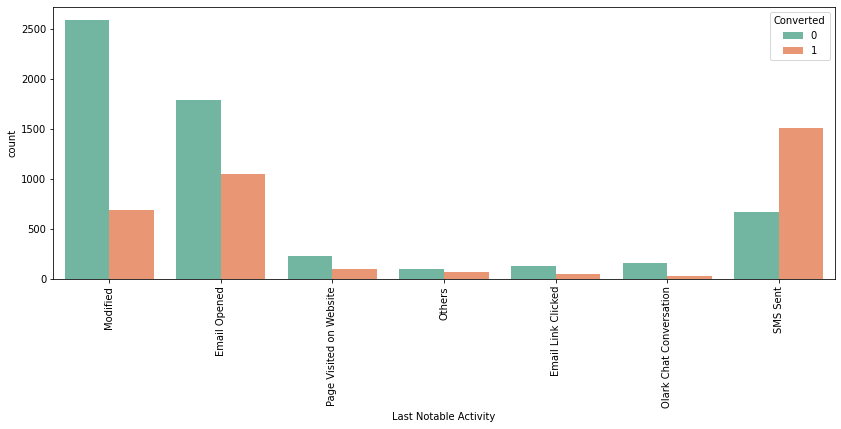

In [246]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data , palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

### This also seems like a column to drop since it is maintained within the company. So adding it to cols to drop

In [247]:
# Append 'Last Notable Activity' to the cols_to_drop List since it has highly skewed data
cols_drop.append('Last Notable Activity')

#checking updated list for columns to be dropped
cols_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [248]:
lead_data.shape

(9103, 25)

In [249]:
# dropping the columns
leads = lead_data.drop(cols_drop, axis = 1)

In [250]:
# Checking new dataframe
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 640.1+ KB


### 2.4 Analysing Numerical columns

#### Checking the Target variable : Converted

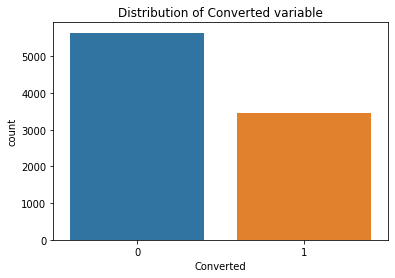

In [251]:
# First let's visualize this variable to check the conversion rate overall
sns.countplot(leads.Converted)
plt.title('Distribution of Converted variable')
plt.show()


In [252]:
# Finding out the conversion rate
(sum(leads['Converted'])/len(leads['Converted'].index))*100

38.02043282434362

### Inference

#### The overall conversion rate is just 38%.

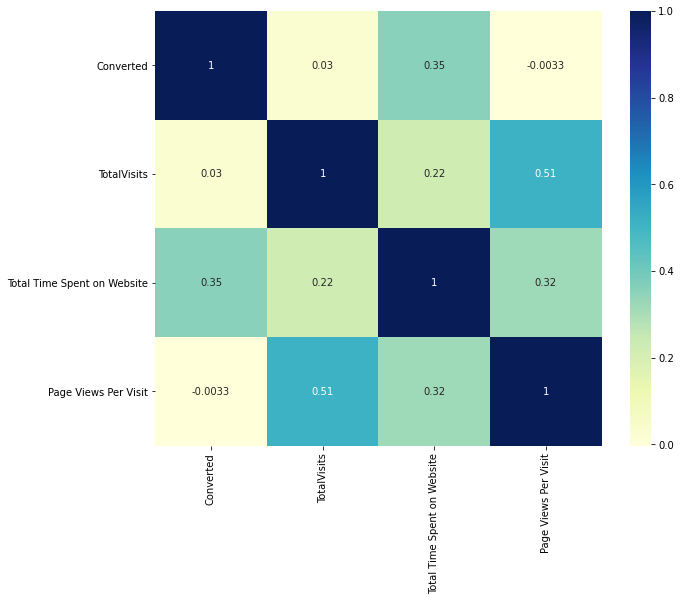

In [253]:
# Building correlation heatmap to check for which variables are highly correlated with the target 'Converted'
# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads[['Converted','TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Checking for outliers: Total Visits

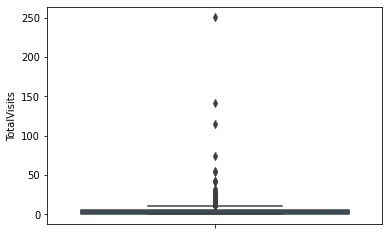

In [254]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [255]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

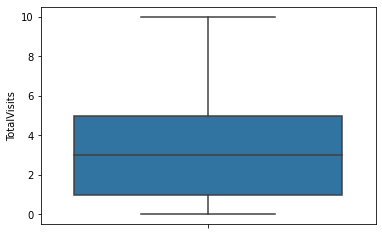

In [256]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

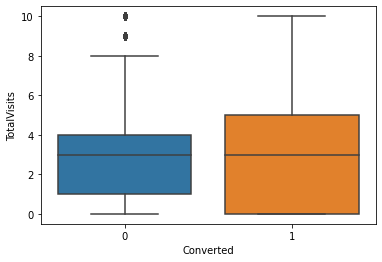

In [257]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

### Inference

#### The median for both seems to be same. Hence cannot conclude anything.

#### Checking for outliers: Total time spent on website

In [258]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

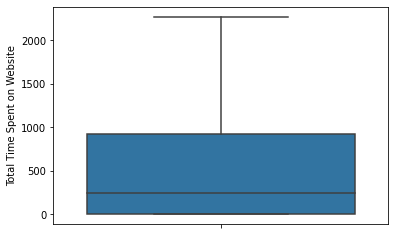

In [259]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

#### There are no outliers for this variable

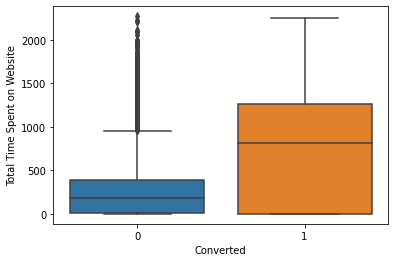

In [260]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

### Inference

#### Can be clearly seen that people who are converted to hot leads spend much more time on the website.

#### Checking for outliers: Page views per visit

In [261]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

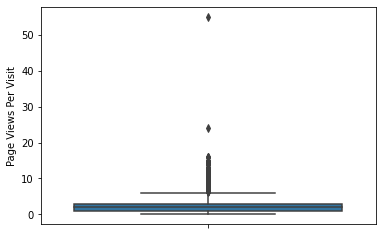

In [262]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

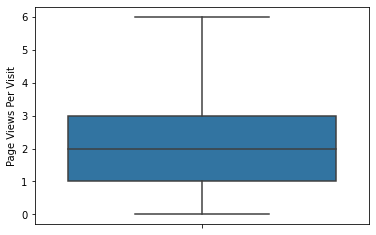

In [263]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

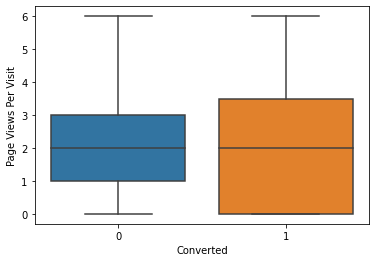

In [264]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

#### Again, no conclusion can be derived from this since the median is same for both converted and not converted

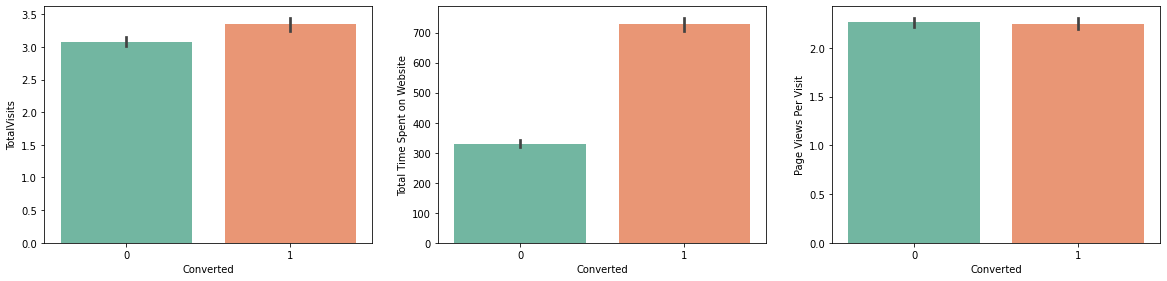

In [265]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)
plt.show()

### Step 2: Data Preparation

In [266]:
# Convert binary values in 'Do Not Email' to 0 and 1
leads['Do Not Email'] = leads['Do Not Email'].map({'Yes':1 , 'No': 0})

In [267]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [268]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 640.1+ KB


#### There are 3 categorical columns for which we can create dummies

In [269]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [270]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],axis = 1)



dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis = 1)
leads = pd.concat([leads, dummy], axis = 1)


dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Not provided'], axis = 1)
leads = pd.concat([leads, dummy], axis = 1)

In [271]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols, axis = 1,inplace = True)

In [272]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,5.0,674,2.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,1,2.0,1532,2.0,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1.0,305,1.0,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,0,1,2.0,1428,1.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


### Step 3: Train test Split

In [273]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [274]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,2.0,1532,2.0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,1.0,305,1.0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,2.0,1428,1.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [275]:
# Putting response variable to y
y = leads['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [276]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 4: Feature Scaling

In [277]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [278]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,-0.294015,-0.068258,1.476324,-0.423364,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
5520,-0.294015,1.362470,-0.771066,2.083179,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1962,-0.294015,0.647106,-0.571257,0.133646,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1566,-0.294015,2.435517,1.393834,0.690655,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
9170,-0.294015,-1.141305,-0.881052,-1.258878,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [279]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.02043282434362

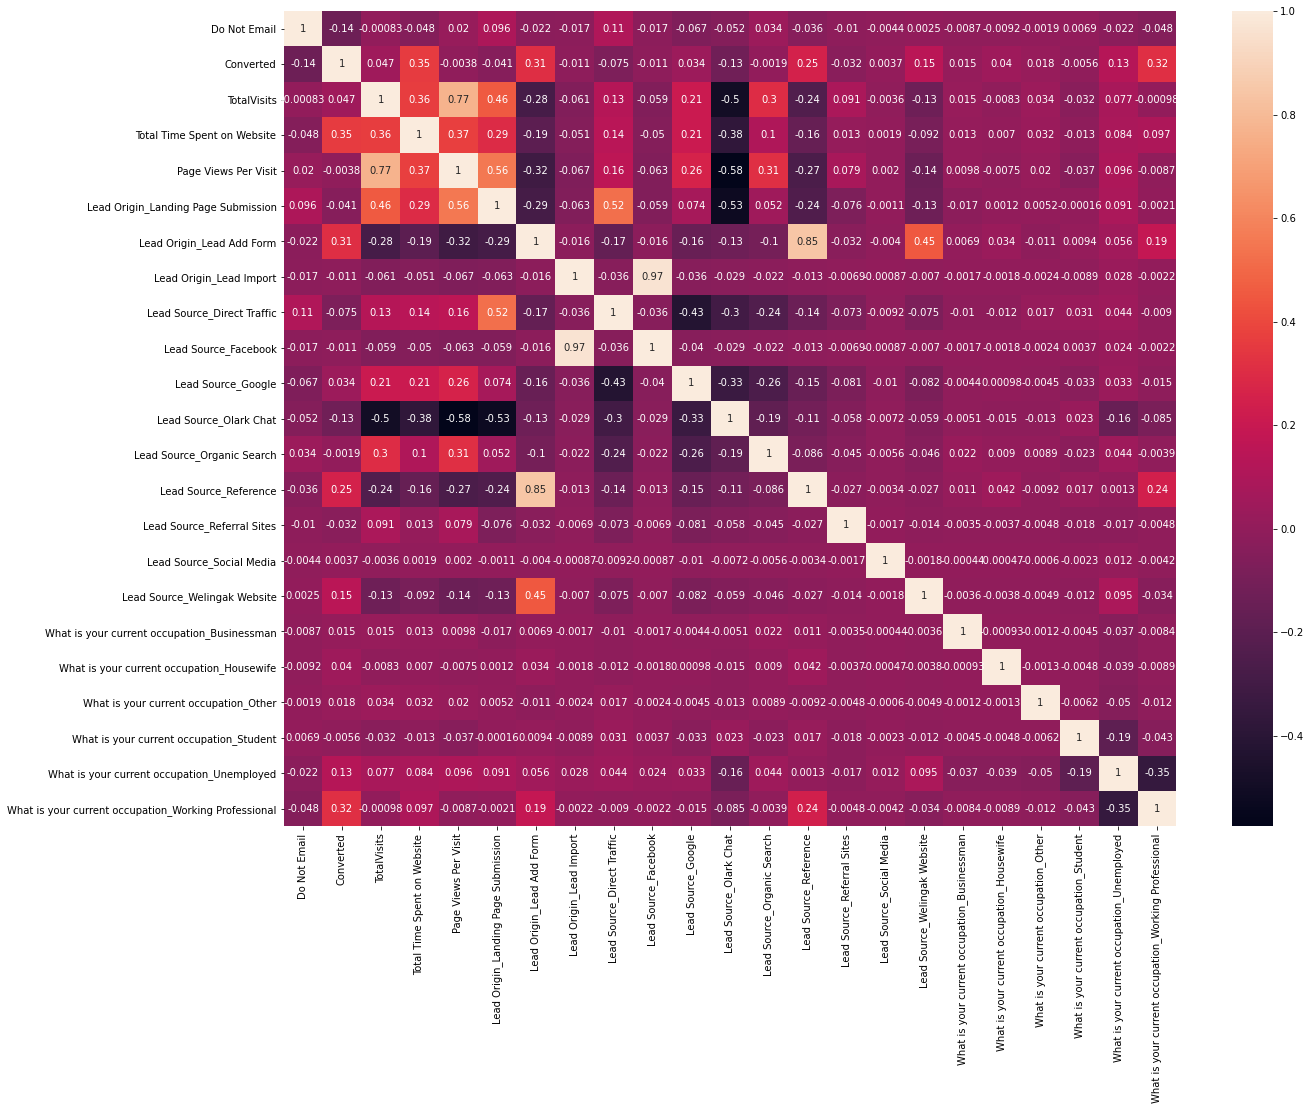

In [280]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [281]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'], axis = 1)

In [282]:
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'], axis = 1)

### Step 5: Model building using Stats Model and RFE

In [283]:
# importing necessary library
import statsmodels.api as sm

In [284]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator = logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [285]:
rfe.support_

array([ True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True])

In [286]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [287]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [288]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Social Media'],
      dtype='object')

### Model 1:

In [289]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])

# Convert the column types to float
X_train_sm = X_train_sm.astype(float)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.8
Date:                Tue, 16 Apr 2024   Deviance:                       5725.6
Time:                        14:11:25   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3490
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2420      0.096    -12.979      0.000      -1.430      -1.054
Do Not Email                                            -0.3583      0.043     -8.295      0.000      -0.443      -0.274
Total Time Spent on Website                              1.0998      0.038     28.576      0.000       1.024       1.175
Lead Origin_Lead Add Form                                4.1642      0.774      5.379      0.000       2.647       5.682
Lead Source_Direct Traffic                              -1.0592      0.108     -9.834      0.000      -1.270      -0.848
Lead Source_Google                                      -0.7850      0.103     -7.616      0.000      -0.987      -0.583
Lead Source_Organic Search                              -0.8803      0.124     -7.094      0.000      -1.123      -0.637
Lead Source_Reference                                   -1.3303      0.806     -1.650      0.099      -2.911       0.250
Lead Source_Referral Sites                              -1.3703      0.336     -4.075      0.000      -2.029      -0.711
Lead Source_Welingak Website                             0.7219      1.055      0.684      0.494      -1.347       2.790
What is your current occupation_Businessman              1.5018      0.999      1.503      0.133      -0.456       3.460
What is your current occupation_Housewife               23.8830    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_Other                    1.3577      0.641      2.118      0.034       0.101       2.614
What is your current occupation_Student                  1.1827      0.225      5.268      0.000       0.743       1.623
What is your current occupation_Unemployed               1.3095      0.083     15.683      0.000       1.146       1.473
What is your current occupation_Working Professional     3.8054      0.189     20.105      0.000       3.434       4.176
========================================================================================================================
"""

#### Inference
##### p-value of 'What is your current occupation_Housewife' is very high and hence highly correlated and can be dropped

In [290]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model 2

In [291]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])

# Convert the column types to float
X_train_sm = X_train_sm.astype(float)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.3
Date:                Tue, 16 Apr 2024   Deviance:                       5744.6
Time:                        14:12:00   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3470
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2247      0.095    -12.862      0.000      -1.411      -1.038
Do Not Email                                            -0.3597      0.043     -8.331      0.000      -0.444      -0.275
Total Time Spent on Website                              1.0996      0.038     28.619      0.000       1.024       1.175
Lead Origin_Lead Add Form                                4.1662      0.774      5.381      0.000       2.649       5.684
Lead Source_Direct Traffic                              -1.0517      0.108     -9.778      0.000      -1.262      -0.841
Lead Source_Google                                      -0.7756      0.103     -7.540      0.000      -0.977      -0.574
Lead Source_Organic Search                              -0.8645      0.124     -6.984      0.000      -1.107      -0.622
Lead Source_Reference                                   -1.3089      0.806     -1.623      0.105      -2.889       0.272
Lead Source_Referral Sites                              -1.3681      0.336     -4.072      0.000      -2.027      -0.710
Lead Source_Welingak Website                             0.7294      1.055      0.691      0.490      -1.339       2.798
What is your current occupation_Businessman              1.4744      1.000      1.475      0.140      -0.485       3.434
What is your current occupation_Other                    1.3321      0.641      2.079      0.038       0.076       2.588
What is your current occupation_Student                  1.1579      0.224      5.160      0.000       0.718       1.598
What is your current occupation_Unemployed               1.2836      0.083     15.498      0.000       1.121       1.446
What is your current occupation_Working Professional     3.7795      0.189     19.999      0.000       3.409       4.150
========================================================================================================================
"""

#### Inference
##### p-value of 'Lead Source_Welingak Website' is high and hence can be dropped

In [293]:
col = col.drop('Lead Source_Welingak Website', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'What is your current occupation_Businessman',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model 3

In [294]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])

# Convert the column types to float
X_train_sm = X_train_sm.astype(float)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.5
Date:                Tue, 16 Apr 2024   Deviance:                       5745.1
Time:                        14:17:23   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3470
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2215      0.095    -12.847      0.000      -1.408      -1.035
Do Not Email                                            -0.3606      0.043     -8.350      0.000      -0.445      -0.276
Total Time Spent on Website                              1.1006      0.038     28.654      0.000       1.025       1.176
Lead Origin_Lead Add Form                                4.6079      0.523      8.807      0.000       3.582       5.633
Lead Source_Direct Traffic                              -1.0559      0.107     -9.832      0.000      -1.266      -0.845
Lead Source_Google                                      -0.7818      0.103     -7.623      0.000      -0.983      -0.581
Lead Source_Organic Search                              -0.8687      0.124     -7.026      0.000      -1.111      -0.626
Lead Source_Reference                                   -1.7536      0.564     -3.109      0.002      -2.859      -0.648
Lead Source_Referral Sites                              -1.3724      0.336     -4.085      0.000      -2.031      -0.714
What is your current occupation_Businessman              1.4745      1.000      1.475      0.140      -0.485       3.434
What is your current occupation_Other                    1.3324      0.641      2.080      0.038       0.077       2.588
What is your current occupation_Student                  1.1571      0.225      5.154      0.000       0.717       1.597
What is your current occupation_Unemployed               1.2843      0.083     15.505      0.000       1.122       1.447
What is your current occupation_Working Professional     3.7806      0.189     20.002      0.000       3.410       4.151
========================================================================================================================
"""

#### Inference:
##### 'What is your current occupation_Businessman' has high p-value and hence can be dropped

In [295]:
col = col.drop('What is your current occupation_Businessman', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

### Model 4:

In [296]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])

# Convert the column types to float
X_train_sm = X_train_sm.astype(float)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.5
Date:                Tue, 16 Apr 2024   Deviance:                       5747.1
Time:                        14:26:39   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3468
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2155      0.095    -12.809      0.000      -1.401      -1.030
Do Not Email                                            -0.3610      0.043     -8.360      0.000      -0.446      -0.276
Total Time Spent on Website                              1.1004      0.038     28.661      0.000       1.025       1.176
Lead Origin_Lead Add Form                                4.6094      0.523      8.810      0.000       3.584       5.635
Lead Source_Direct Traffic                              -1.0547      0.107     -9.823      0.000      -1.265      -0.844
Lead Source_Google                                      -0.7815      0.103     -7.622      0.000      -0.983      -0.581
Lead Source_Organic Search                              -0.8655      0.124     -7.003      0.000      -1.108      -0.623
Lead Source_Reference                                   -1.7436      0.564     -3.091      0.002      -2.849      -0.638
Lead Source_Referral Sites                              -1.3729      0.336     -4.087      0.000      -2.031      -0.715
What is your current occupation_Other                    1.3254      0.641      2.069      0.039       0.070       2.581
What is your current occupation_Student                  1.1497      0.224      5.122      0.000       0.710       1.590
What is your current occupation_Unemployed               1.2770      0.083     15.469      0.000       1.115       1.439
What is your current occupation_Working Professional     3.7733      0.189     19.975      0.000       3.403       4.143
========================================================================================================================
"""

#### Inference:
##### All columns seem to have low p-value and hence we can keep all of them

### Step 6: Calculating VIF

In [300]:
# importing vif from statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe with features and VIF
vif = pd.DataFrame()
X = X_train[col].astype(float)
vif['Features'] = X_train[col].columns
vif['VIF'] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,3.81
6,Lead Source_Reference,3.63
10,What is your current occupation_Unemployed,2.59
4,Lead Source_Google,1.71
3,Lead Source_Direct Traffic,1.68
5,Lead Source_Organic Search,1.31
11,What is your current occupation_Working Profes...,1.29
1,Total Time Spent on Website,1.12
9,What is your current occupation_Student,1.05
0,Do Not Email,1.03


#### Inference
##### All the VIF values are less than 5, hence we can keep these features as the final predictors

### Step 7: Predictions

In [301]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.733171
5520    0.149889
1962    0.224005
1566    0.968208
9170    0.309629
5097    0.111166
8954    0.254295
309     0.258676
5519    0.111166
1050    0.648711
dtype: float64

In [302]:
# Taking only the predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.7331714 , 0.14988878, 0.22400453, 0.96820766, 0.30962916,
       0.11116625, 0.2542946 , 0.25867625, 0.11116625, 0.64871084])

In [303]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.733171,7962
1,0,0.149889,5520
2,0,0.224005,1962
3,1,0.968208,1566
4,0,0.309629,9170


In [304]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.733171,7962,1
1,0,0.149889,5520,0
2,0,0.224005,1962,0
3,1,0.968208,1566,1
4,0,0.309629,9170,0


### Model Evaluation Metrics

In [305]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3547  406]
 [ 849 1570]]


In [306]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8030445699937225


In [307]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [308]:
# Sensitivity
TP / float(TP+FN)

0.649028524183547

In [309]:
# Specificity
TN / float(TN+FP)

0.8972931950417404

In [310]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10270680495825955


In [311]:
# positive predictive value 
print (TP / float(TP+FP))

0.7945344129554656


In [312]:
# Negative predictive value
print (TN / float(TN+ FN))

0.806869881710646


### Plotting ROC Curve

In [313]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [314]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

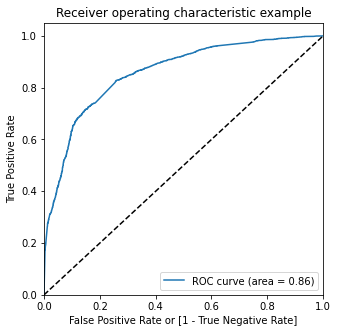

In [315]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### The ROC Curve should be a value close to 1. We are getting a good value of 0.86 indicating a good predictive model.

### Finding Optimal Cutoff Point

In [316]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.733171,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.149889,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.224005,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.968208,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.309629,9170,0,1,1,1,1,0,0,0,0,0,0


In [317]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.516321  0.982224  0.231217
0.2   0.2  0.690207  0.906573  0.557804
0.3   0.3  0.771186  0.829682  0.735391
0.4   0.4  0.801318  0.699463  0.863648
0.5   0.5  0.803045  0.649029  0.897293
0.6   0.6  0.780917  0.561802  0.915001
0.7   0.7  0.759259  0.467135  0.938022
0.8   0.8  0.733522  0.352625  0.966608
0.9   0.9  0.690050  0.192228  0.994688


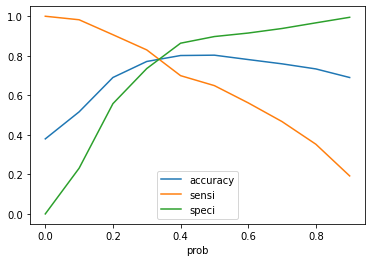

In [318]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [319]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.733171,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.149889,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.224005,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.968208,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.309629,9170,0,1,1,1,1,0,0,0,0,0,0,1


In [320]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.733171,7962,1,73
1,0,0.149889,5520,0,15
2,0,0.224005,1962,0,22
3,1,0.968208,1566,1,97
4,0,0.309629,9170,1,31


In [321]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

final_Predicted
1    2007
0     412
Name: count, dtype: int64

In [323]:
# check the precentage of final_predicted conversions

2007/float(2007+412)

0.829681686647375

### Hence, we can see that the final prediction of conversions have a target of 83% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.

### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [324]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7711864406779662

In [325]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2907, 1046],
       [ 412, 2007]])

In [326]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [327]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.829681686647375

In [328]:
# Let us calculate specificity
TN / float(TN+FP)

0.7353908423981786

### Inference:
#### So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

#### 1. Accuracy : 77.11%
#### 2. Sensitivity :82.96%
#### 3. Specificity : 73.53%
#### Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [329]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2646091576018214


In [330]:
# Positive predictive value 
print (TP / float(TP+FP))

0.657386177530298


In [331]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8758662247664959


### Precision and Recall

In [332]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2907, 1046],
       [ 412, 2007]])

In [333]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.657386177530298

In [334]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.829681686647375

In [335]:
from sklearn.metrics import precision_score, recall_score

In [336]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.657386177530298

In [337]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.829681686647375

### Precision and Recall Trade-off

In [338]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [339]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

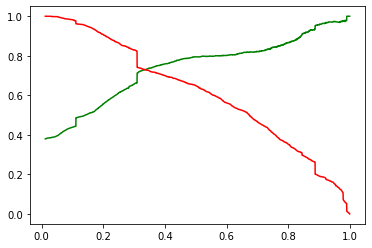

In [340]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on the test set

In [341]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.058621,-0.108519,0.416452,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4050,-0.293797,-1.150166,-0.888077,-1.263530,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
7201,3.403712,-0.422469,0.420993,-0.143542,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1196,-0.293797,0.305228,-0.110357,0.976446,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
8219,-0.293797,1.396773,-0.433947,-0.283540,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [342]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.108519,False,False,False,True,False,False,False,False,True,False
4050,-0.293797,-0.888077,True,False,False,False,True,False,False,False,True,False
7201,3.403712,0.420993,False,True,False,False,False,False,False,False,True,False
1196,-0.293797,-0.110357,False,False,False,True,False,False,False,False,True,False
8219,-0.293797,-0.433947,False,True,False,False,False,False,False,False,True,False


In [343]:
X_test_sm = sm.add_constant(X_test)

In [344]:
X_test_sm.shape

(2731, 13)

In [346]:
y_test_pred = res.predict(X_test_sm.astype(float))

In [347]:
y_test_pred[:10]

3504    0.306327
4050    0.886565
7201    0.146954
1196    0.305897
8219    0.203498
8747    0.110397
9048    0.314569
6524    0.223879
7693    0.052063
8187    0.886565
dtype: float64

In [348]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [349]:
# Let's see the head
y_pred_1.head()

,0
3504,0.306327
4050,0.886565
7201,0.146954
1196,0.305897
8219,0.203498


In [350]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [351]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [352]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [353]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [354]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.306327
1,1,4050,0.886565
2,0,7201,0.146954
3,0,1196,0.305897
4,1,8219,0.203498


In [355]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [356]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.306327
1,1,4050,0.886565
2,0,7201,0.146954
3,0,1196,0.305897
4,1,8219,0.203498


### Assigning Lead Score

In [357]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [358]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.306327,31
1,4050,1,0.886565,89
2,7201,0,0.146954,15
3,1196,0,0.305897,31
4,8219,1,0.203498,20


In [359]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [360]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.306327,31,1
1,4050,1,0.886565,89,1
2,7201,0,0.146954,15,0
3,1196,0,0.305897,31,1
4,8219,1,0.203498,20,0


In [361]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

final_Predicted
1    866
0    176
Name: count, dtype: int64

In [362]:
# check the precentage of final_predicted conversions on test data

866/float(866+176)

0.8310940499040307

#### Hence we can see that the final prediction of conversions have a target rate of 83% (same as predictions made on training data set)
#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [363]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7751739289637496

In [364]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1251,  438],
       [ 176,  866]])

In [365]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [366]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8310940499040307

In [367]:
# Let us calculate specificity
TN / float(TN+FP)

0.7406749555950266

### Precision and Recall metrics for the test set

In [368]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6641104294478528

In [369]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8310940499040307

### Inference:
#### After running the model on the Test Data these are the figures we obtain:

#### 1. Accuracy : 77.52%
#### 2. Sensitivity :83.01%
#### 3. Specificity : 74.13%

## Conclusion:

#### While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
#### Accuracy, Sensitivity and Specificity values of test set are around 77%, 83% and 74% which are approximately closer to the respective values calculated using trained set.
#### Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
#### Hence overall this model seems to be good.

#### Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :

#### 1. Lead Origin_Lead Add Form
#### 2. What is your current occupation_Working Professional
#### 3. Total Time Spent on Website
 